In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# %matplotlib inline

### Creating a model class which inherits the nn.Module

which takes 4 inputs as paramters
- sepal length
- sepal width
- petal length
- petal width

forward it to a hidden layer 1 (H1) with n number of neurons >> \
which sends it to hidden layer 2 (H2) with the same n number of neurons >> \
then classifies as 3 classes of flowers



In [2]:
class Model(nn.Module):
    def __init__(self, in_feature = 4, h1 = 7, h2 = 7, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_feature, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x)) #rectified linear unit function element-wise
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
torch.manual_seed(33) #randomizing the initiation

model = Model() #creating an instance of the model class

In [4]:
#creating dataframe of the iris dataset

df = pd.read_csv('iris-dataset/iris.data', header = None, names = ['sepal_length' , 'sepal_width', 'petal_length', 'petal_width', 'species'])
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
#mapping each species to an integer
species_mapping = {
    'Iris-setosa': 0.0,
    'Iris-versicolor': 1.0,
    'Iris-virginica': 2.0
}

#by using map function we can substitute one value to another
df['species'] = df['species'].map(species_mapping)

In [7]:
df['species'].unique()

array([0., 1., 2.])

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
#splitting the dataset into X and y

X = df.drop('species', axis=1).values #values is used to convert these dataframes into numpy values
y = df['species'].values

In [10]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [11]:
#splitting X and y into train test each
#test_size - 30% and train_size - 70%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41) 

In [12]:
#converting X features to FloatTensor
X_train = torch.FloatTensor(X_train) #float tensor because the data values are in float
X_test = torch.FloatTensor(X_test) 

#converting y features to LongTensor
y_train = torch.LongTensor(y_train) #long tensors are 64 bit integers as we set 1.0, 2.0 and 3.0
y_test = torch.LongTensor(y_test)

# TODO: make the mapping of species as integers and compare with the long tensor values

In [13]:
#setting criterion of the model to measure the error

#choosing adam optimizer which goes through in loop and continuously optimizes
#setting a learning rate - if our error does not go low after epoch then we will lower the learning rate
#

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
#training model

epoch = 200 #determining the number of iterations
losses = []

for i in range(epoch):
    y_pred = model.forward(X_train) #getting predicted results
    loss = criterion(y_pred, y_train) #measuring the loss 
    losses.append(loss.detach().numpy()) #get count of the losses

    if i % 10 == 0: #printing after every 10 epoch
        print(f"Epoch: {i}, and loss: {loss}")

    #back propagating to learn better
    #basically we send error rate of forwards propagation and use it as an input to the network to learn better

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, and loss: 1.0837959051132202
Epoch: 10, and loss: 0.9949871301651001
Epoch: 20, and loss: 0.7974726557731628
Epoch: 30, and loss: 0.5338335037231445
Epoch: 40, and loss: 0.36541426181793213
Epoch: 50, and loss: 0.2962963283061981
Epoch: 60, and loss: 0.22638538479804993
Epoch: 70, and loss: 0.15497364103794098
Epoch: 80, and loss: 0.0999579057097435
Epoch: 90, and loss: 0.06829997152090073
Epoch: 100, and loss: 0.05154279246926308
Epoch: 110, and loss: 0.04182277247309685
Epoch: 120, and loss: 0.03550523519515991
Epoch: 130, and loss: 0.030987761914730072
Epoch: 140, and loss: 0.027556337416172028
Epoch: 150, and loss: 0.024821709841489792
Epoch: 160, and loss: 0.022571170702576637
Epoch: 170, and loss: 0.020674211904406548
Epoch: 180, and loss: 0.019045282155275345
Epoch: 190, and loss: 0.017624318599700928


Text(0, 0.5, 'Losses')

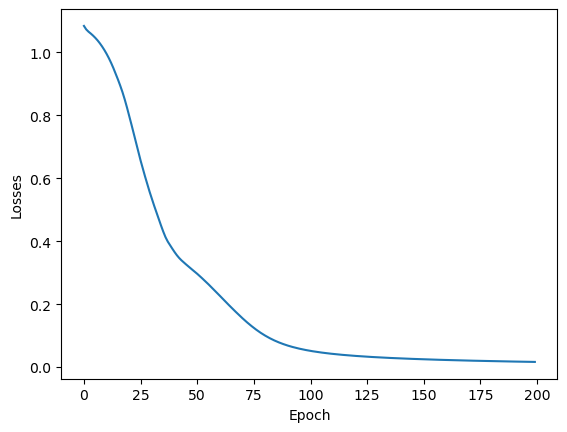

In [15]:
plt.plot(range(epoch), losses)
plt.xlabel("Epoch")
plt.ylabel("Losses")